In [51]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder




In [52]:
random.seed(0)

In [53]:
## loading the file
health_care = pd.read_csv('../healthcare/train_data.csv', na_values=['NA', 'NaN', '?'])

In [11]:
# Dropping na values for 
#health_care = health_care.dropna()


## Feature engineering

We will add 2 features : 
- Visit number
- New Patient

In [54]:
n = health_care.shape[0]
visits = []
patientid = np.array(health_care['patientid'])
for i in range(n) :
    count = (patientid[:i+1] == patientid[i]).sum()
    visits.append(count)
    
health_care['Visit Number'] = visits
health_care['New Patient'] = (health_care['Visit Number']==1).astype('int32')

## Hot encoded Data

In [55]:
# Function to hot encode the column with name : name for dataframe df
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True) ## inplace to make changed on the original df

In [56]:
## Pre processing these columns

le_string_columns = [  'Severity of Illness', 'Age' ]
dummies_string_columns = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code',  'Type of Admission']
encoder = LabelEncoder()
#ohEncoder = OneHotEncoder()

## label_encoded data
Xe = health_care.drop(['Stay', 'case_id', 'City_Code_Hospital','City_Code_Patient', 'Bed Grade'], axis=1)
Xe['Severity of Illness']= Xe['Severity of Illness'].map({'Minor': 0,  'Moderate': 1,'Extreme': 2})
Xe['Age'] = encoder.fit_transform(Xe['Age'])

ye = health_care['Stay']
ye = encoder.fit_transform(ye)


for column in dummies_string_columns :
    encode_text_dummy(Xe, column)
    

In [57]:
#checking for missing values
Xe.isnull().values.any()

False

## Scaling Hot Encoded Data

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = Xe.values
y = ye
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
for i in range(X_train.shape[1]) :
    X_train[:,i]= scaler.fit_transform(X_train[:,i].reshape(-1, 1))[:,0]
    X_test[:,i] = scaler.transform(X_test[:,i].reshape(-1, 1))[:,0]

# Metrics to use for this dataset

In [16]:
K = 10
def score(y_test, y_pred):
    score = 1-np.mean(np.abs(y_test-y_pred))/K
    return score
    

# Classification models to try :

- Decision trees
- K nearest neighbor
- PCA
- Random Forest


# Decision Trees

In [18]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [20]:
y_train.shape

(238828,)

In [21]:
y_train

array([2, 2, 3, ..., 1, 2, 3])

In [22]:
y_pred = tree.predict(X_test)

In [23]:
acc = accuracy_score(y_test, y_pred)

In [24]:
acc

0.28600678306745386

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

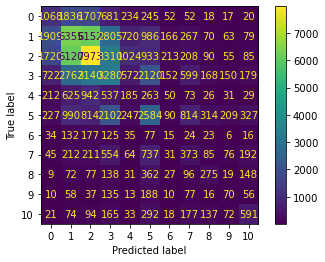

In [26]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [27]:
print(score(y_test, y_pred))

0.8472289913327471


In [28]:
kf = KFold(5, shuffle=True)
fold = 1

for train_index, validate_index in kf.split(X,y):
    tree.fit(X[train_index], y[train_index])
    y_test = y[validate_index]
    y_pred = tree.predict(X[validate_index])
    print(f'Accuracy : %.4f' % accuracy_score(y_test, y_pred))
    print(f'Score : %.4f' % score(y_test, y_pred))

Accuracy : 0.2869
Score : 0.8472
Accuracy : 0.2850
Score : 0.8470
Accuracy : 0.2855
Score : 0.8473
Accuracy : 0.2863
Score : 0.8475
Accuracy : 0.2855
Score : 0.8480


In [36]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [37]:
y_pred = tree.predict(X_test)


In [38]:
y_pred.shape

(79610,)

In [39]:
y_test.shape

(79610,)

In [40]:
print(accuracy_score(y_test, y_pred))

0.2836201482225851


In [41]:
print(score(y_test, y_pred))

0.8464853661600301


### Adding PCA


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(5)

Xp = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=0.25)
for i in range(X_train.shape[1]) :
    X_train[:,i]= scaler.fit_transform(X_train[:,i].reshape(-1, 1))[:,0]
    X_test[:,i] = scaler.transform(X_test[:,i].reshape(-1, 1))[:,0]



In [ ]:
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
print(score(y_test, y_pred,11))

# SVM

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
for i in range(X_train.shape[1]) :
    X_train[:,i]= scaler.fit_transform(X_train[:,i].reshape(-1, 1))[:,0]
    X_test[:,i] = scaler.transform(X_test[:,i].reshape(-1, 1))[:,0]
    
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.2f' % score(y_test, y_pred,11))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [59]:
forest = RandomForestClassifier(n_estimators=10, criterion='entropy')
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

Accuracy : 0.342
Score : 0.8722


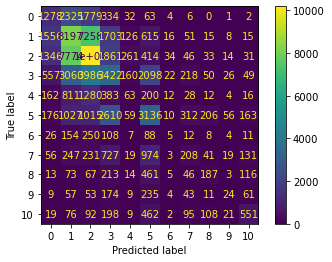

In [60]:
y_pred = forest.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [61]:
kf = KFold(5, shuffle=True)
fold = 1

for train_index, validate_index in kf.split(X,y):
    forest.fit(X[train_index], y[train_index])
    ytest = y[validate_index]
    y_pred = forest.predict(X[validate_index])
    print(f'Accuracy : %.4f' % accuracy_score(ytest, y_pred))
    print(f'Score : %.4f' % score(ytest, y_pred))

Accuracy : 0.3410
Score : 0.8706
Accuracy : 0.3419
Score : 0.8718
Accuracy : 0.3407
Score : 0.8717
Accuracy : 0.3420
Score : 0.8720
Accuracy : 0.3397
Score : 0.8717


In [69]:
accuracy_data = []
score_data = []

for i in range(1,128):
    forest = RandomForestClassifier(n_estimators=i, criterion='entropy')
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    score = 1-np.mean(np.abs(y_test-y_pred))/K
    print(f'Accuracy {i} estimators : %.4f' % accuracy)
    print(f'Score {i} estimators : %.4f' % score)
    accuracy_data.append(accuracy)
    score_data.append(score)
    
    

Accuracy 1 estimators : 0.2802
Score 1 estimators : 0.8446
Accuracy 2 estimators : 0.2922
Score 2 estimators : 0.8535
Accuracy 3 estimators : 0.3032
Score 3 estimators : 0.8568
Accuracy 4 estimators : 0.3108
Score 4 estimators : 0.8585
Accuracy 5 estimators : 0.3221
Score 5 estimators : 0.8636
Accuracy 6 estimators : 0.3245
Score 6 estimators : 0.8650
Accuracy 7 estimators : 0.3316
Score 7 estimators : 0.8682
Accuracy 8 estimators : 0.3365
Score 8 estimators : 0.8696
Accuracy 9 estimators : 0.3387
Score 9 estimators : 0.8707
Accuracy 10 estimators : 0.3418
Score 10 estimators : 0.8714
Accuracy 11 estimators : 0.3445
Score 11 estimators : 0.8725
Accuracy 12 estimators : 0.3452
Score 12 estimators : 0.8731
Accuracy 13 estimators : 0.3488
Score 13 estimators : 0.8745
Accuracy 14 estimators : 0.3490
Score 14 estimators : 0.8745
Accuracy 15 estimators : 0.3509
Score 15 estimators : 0.8748
Accuracy 16 estimators : 0.3531
Score 16 estimators : 0.8757
Accuracy 17 estimators : 0.3545
Score 17 e

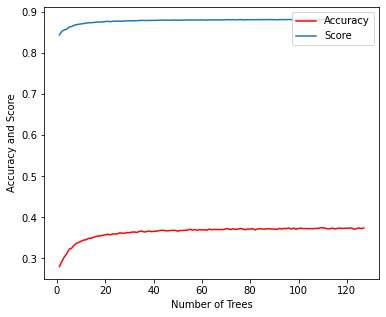

In [75]:
nums = np.arange(1,128)
fig = plt.figure(figsize=(6,5))
plt.plot(nums, accuracy_data, c='r', label='Accuracy')
plt.plot(nums, score_data, label='Score')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy and Score')
plt.legend(loc='upper right')
plt.show()

Accuracy : 0.374
Score : 0.88


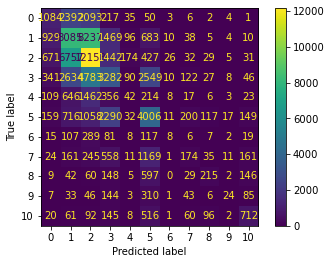

In [78]:
y_pred = forest.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test-y_pred))/K
print(f'Score : %.2f' % score)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

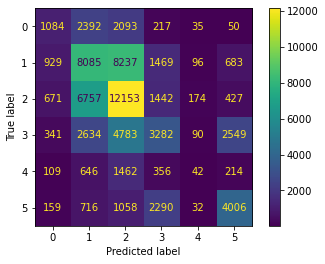

In [79]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

# Naive Bayes

In [137]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB(var_smoothing=1.1)
model.fit(X_test, y_test)


GaussianNB(var_smoothing=1.1)

Accuracy : 0.311
Score : 0.8517


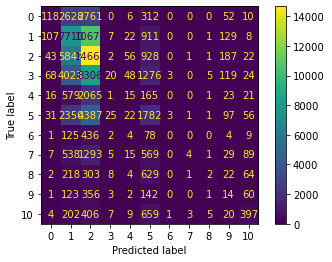

In [138]:
y_pred = model.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test-y_pred))/K
print(f'Score : %.4f' % score)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

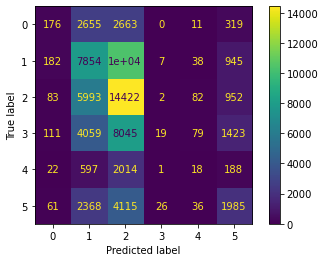

In [92]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

# Multinomial Naive Bayes

In [83]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_test, y_test)


ValueError: Negative values in data passed to MultinomialNB (input X)

In [ ]:
y_pred = model.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()